In [159]:
import h5py,os,glob
import numpy as np 
import pandas as pd
import gbm
from astropy.time import Time
from gbm.finder import BurstCatalog
from gbm.finder import TriggerFtp
import healpy as hp
from healpy.newvisufunc import projview
from astropy.io import fits
import reproject

In [115]:
df = pd.read_csv('/work/yifan.wang/grb/grbdata/longgrb.csv')

In [116]:
df

trigger_name          name             trigger_time          ra  \
0     bn120403857  GRB120403857  2012-04-03 20:33:58.493   55.338333   
1     bn120227725  GRB120227725  2012-02-27 17:24:41.054  256.730000   
2     bn141205018  GRB141205018  2014-12-05 00:25:29.813  294.610000   
3     bn180630467  GRB180630467  2018-06-30 11:11:54.405   48.958750   
4     bn170116238  GRB170116238  2017-01-16 05:43:15.259   72.940000   
...           ...           ...                      ...         ...   
3286  bn210624041  GRB210624041  2021-06-24 00:58:23.248  119.320000   
3287  bn091012783  GRB091012783  2009-10-12 18:47:02.770  109.400000   
3288  bn130528695  GRB130528695  2013-05-28 16:41:24.409  138.737917   
3289  bn090813174  GRB090813174  2009-08-13 04:10:42.593  225.802083   
3290  bn110201399  GRB110201399  2011-02-01 09:35:10.251  137.580000   

            dec  error_radius     t90  t90_error       gpstime  
0    -89.009167        0.0011   4.288      1.935  1.017520e+09  
1    -88.860000        1.2100  17.408      0.810  1.014399e+09  
2    -87.580000        3.9000  13.056      1.280  1.101774e+09  
3    -87.478611        0.0010  12.032      1.864  1.214392e+09  
4    -87.430000        9.3700   9.216      3.620  1.168581e+09  
...         ...           ...     ...        ...           ...  
3286  87.110000        4.6400   0.304      0.333  1.308532e+09  
3287  87.270000        2.4500   0.704      2.499  9.394084e+08  
3288  87.270000        0.0500  55.553      1.864  1.053795e+09  
3289  88.568611        0.0017   7.552      0.362  9.341719e+08  
3290  88.605278        0.0001   8.192      0.870  9.805881e+08  

[3291 rows x 9 columns]

# Selection by observation run

In [117]:
tO1_start = Time('2015-09-12T00:00:00')
tO1_end = Time('2016-01-19T16:00:00')

tO2_start = Time('2016-11-30T16:00:00')
tO2_end = Time('2017-08-25T22:00:00')

tO3a_start = Time('2019-04-01T15:00:00')
tO3a_end = Time('2019-10-01T15:00:00')

tO3b_start = Time('2019-11-01T15:00:00')
tO3b_end = Time('2020-03-27T17:00:00')

In [118]:
lgrbsort = {}

for obrun in ['o1','o2','o3a','o3b']:
    if obrun == 'o3b':
        ltime = (df['trigger_time'] < tO3b_end) & (df['trigger_time']> tO3b_start)
    elif obrun == 'o3a':
        ltime = (df['trigger_time'] < tO3a_end) & (df['trigger_time']> tO3a_start)
    elif obrun == 'o2':
        ltime = (df['trigger_time'] < tO2_end) & (df['trigger_time']> tO2_start)
    elif obrun == 'o1':
        ltime = (df['trigger_time'] < tO1_end) & (df['trigger_time']> tO1_start)
    
    lt90 = (df['t90']-abs(df['t90_error']))>4
    lgrb =df[ltime & lt90]
    lgrbsort[obrun] = lgrb.sort_values(by='trigger_time')

In [119]:
lgrbsort['o1']

trigger_name          name             trigger_time          ra  \
1169  bn150912443  GRB150912443  2015-09-12 10:37:38.705  248.442917   
415   bn150913161  GRB150913161  2015-09-13 03:51:57.427  241.050000   
2716  bn150917148  GRB150917148  2015-09-17 03:33:30.723   37.890000   
3208  bn150919606  GRB150919606  2015-09-19 14:33:18.900   65.100000   
2247  bn150922718  GRB150922718  2015-09-22 17:13:42.887   90.560000   
1879  bn150923995  GRB150923995  2015-09-23 23:52:52.541   92.280000   
2573  bn150928359  GRB150928359  2015-09-28 08:37:19.023   83.780000   
1444  bn151001348  GRB151001348  2015-10-01 08:20:35.169  246.740000   
1984  bn151001628  GRB151001628  2015-10-01 15:04:22.408  233.730000   
173   bn151003729  GRB151003729  2015-10-03 17:29:59.933   60.340000   
3196  bn151006413  GRB151006413  2015-10-06 09:54:57.825  147.425833   
3129  bn151009949  GRB151009949  2015-10-09 22:47:03.449  222.000000   
1454  bn151011136  GRB151011136  2015-10-11 03:15:27.254  258.350000   
2977  bn151014592  GRB151014592  2015-10-14 14:13:03.581    0.390000   
1421  bn151021791  GRB151021791  2015-10-21 18:59:28.923  104.340000   
1271  bn151023104  GRB151023104  2015-10-23 02:29:25.137  359.740000   
1556  bn151026169  GRB151026169  2015-10-26 04:03:06.559  228.040000   
82    bn151026523  GRB151026523  2015-10-26 12:32:38.939  107.390000   
3088  bn151027166  GRB151027166  2015-10-27 03:58:24.033  272.487083   
2475  bn151030999  GRB151030999  2015-10-30 23:58:22.637  297.630000   
2812  bn151107851  GRB151107851  2015-11-07 20:24:52.297   31.300000   
597   bn151111356  GRB151111356  2015-11-11 08:33:20.028   56.845000   
515   bn151114645  GRB151114645  2015-11-14 15:28:24.519   62.140000   
220   bn151117442  GRB151117442  2015-11-17 10:36:59.778   19.640000   
2772  bn151118554  GRB151118554  2015-11-18 13:18:05.276  292.980000   
862   bn151120349  GRB151120349  2015-11-20 08:22:53.704  157.250000   
1198  bn151122709  GRB151122709  2015-11-22 17:00:45.006  299.704167   
2477  bn151126293  GRB151126293  2015-11-26 07:01:17.239  338.610000   
1403  bn151129333  GRB151129333  2015-11-29 08:00:06.085   60.820000   
1229  bn151130160  GRB151130160  2015-11-30 03:50:50.019  136.270000   
2611  bn151205657  GRB151205657  2015-12-05 15:46:01.901  229.282083   
618   bn151210041  GRB151210041  2015-12-10 00:59:16.643  293.970000   
2681  bn151211672  GRB151211672  2015-12-11 16:07:34.520  262.490000   
3152  bn151212030  GRB151212030  2015-12-12 00:42:58.448  303.810000   
3033  bn151212064  GRB151212064  2015-12-12 01:32:04.972  313.680000   
1996  bn151219567  GRB151219567  2015-12-19 13:36:22.836  351.190000   
2601  bn151227218  GRB151227218  2015-12-27 05:13:48.856  290.284167   
1920  bn151228949  GRB151228949  2015-12-28 22:47:12.589  344.424167   
258   bn151231443  GRB151231443  2015-12-31 10:37:47.522   65.630000   
1357  bn160101030  GRB160101030  2016-01-01 00:43:53.610  219.650833   
2979  bn160101215  GRB160101215  2016-01-01 05:10:12.860    1.360000   
1875  bn160102500  GRB160102500  2016-01-02 11:59:22.628  223.770000   
2667  bn160102936  GRB160102936  2016-01-02 22:28:16.995  143.440000   
1994  bn160104475  GRB160104475  2016-01-04 11:24:13.220   76.796667   
1491  bn160104918  GRB160104918  2016-01-04 22:01:26.729  280.430000   
2155  bn160106948  GRB160106948  2016-01-06 22:45:30.929  181.610000   
1877  bn160107931  GRB160107931  2016-01-07 22:20:41.502  299.670000   
855   bn160111115  GRB160111115  2016-01-11 02:45:03.291  310.240000   
2000  bn160113398  GRB160113398  2016-01-13 09:32:30.524  187.260000   
3062  bn160118060  GRB160118060  2016-01-18 01:25:42.450   17.720000   
2845  bn160119072  GRB160119072  2016-01-19 01:44:12.563  231.990000   

            dec  error_radius      t90  t90_error       gpstime  
1169 -21.033889        0.0330   33.537      5.843  1.126089e+09  
415  -53.790000        1.9500   20.992      1.305  1.126152e+09  
2716  40.890000       12.7200    7.424      2.521  1.126496e+0

In [120]:
lgrbsort['o1']['trigger_name'].values

array(['bn150912443', 'bn150913161', 'bn150917148', 'bn150919606',
       'bn150922718', 'bn150923995', 'bn150928359', 'bn151001348',
       'bn151001628', 'bn151003729', 'bn151006413', 'bn151009949',
       'bn151011136', 'bn151014592', 'bn151021791', 'bn151023104',
       'bn151026169', 'bn151026523', 'bn151027166', 'bn151030999',
       'bn151107851', 'bn151111356', 'bn151114645', 'bn151117442',
       'bn151118554', 'bn151120349', 'bn151122709', 'bn151126293',
       'bn151129333', 'bn151130160', 'bn151205657', 'bn151210041',
       'bn151211672', 'bn151212030', 'bn151212064', 'bn151219567',
       'bn151227218', 'bn151228949', 'bn151231443', 'bn160101030',
       'bn160101215', 'bn160102500', 'bn160102936', 'bn160104475',
       'bn160104918', 'bn160106948', 'bn160107931', 'bn160111115',
       'bn160113398', 'bn160118060', 'bn160119072'], dtype=object)

# Make the long grb candidate h5 file

In [152]:
with h5py.File('./lgrb_candidate.hdf','w') as f:
    for o in ['o1','o2','o3a','o3b']:
        f['{}/name'.format(o)] = lgrbsort[o]['name'].values
        f['{}/trigger_name'.format(o)] = lgrbsort[o]['trigger_name'].values
        f['{}/gps'.format(o)] = lgrbsort[o]['gpstime'].values
        f['{}/ra'.format(o)] = lgrbsort[o]['ra'].values
        f['{}/dec'.format(o)] = lgrbsort[o]['dec'].values
        f['{}/error_radius'.format(o)] = lgrbsort[o]['error_radius'].values

# Downloading the healpix fits file for all long GRB data

In [50]:
for o in ['o3b','o3a','o2','o1']:
    for i in range(len(lgrbsort[o])):
        print(i)
        trig_finder = TriggerFtp(lgrbsort[o]['name'].values[i][3:])
        trig_finder.get_healpix('/work/yifan.wang/grb/grbdata/lgrb_healpix/'+o+'/')

0
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn191101895_v00.fit [==============================] 100.00%
1
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn191108003_v01.fit [==============================] 100.00%
2
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn191110587_v00.fit [==============================] 100.00%
3
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn191111347_v00.fit [==============================] 100.00%
4
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn191111364_v00.fit [==============================] 100.00%
5
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn191111547_v00.fit [==============================] 100.00%
6
Connection appears to have failed.  Attempting to reconnect...
Recon

glg_healpix_all_bn190611950_v01.fit [==============================] 100.00%
37
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn190612165_v00.fit [==============================] 100.00%
38
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn190613172_v00.fit [==============================] 100.00%
39
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn190615636_v00.fit [==============================] 100.00%
40
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn190619018_v00.fit [==============================] 100.00%
41
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn190619595_v00.fit [==============================] 100.00%
42
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn190620507_v00.fit [===========================

Reconnected.
glg_healpix_all_bn190919764_v00.fit [==============================] 100.00%
91
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn190921699_v00.fit [==============================] 100.00%
92
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn190930400_v01.fit [==============================] 100.00%
93
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_healpix_all_bn191001279_v00.fit [==============================] 100.00%
0
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
1
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
2
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
3
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
4
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
5
Connection appears to have failed.  Attempting to 

Reconnected.
97
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
98
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
99
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
100
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
101
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
102
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
103
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
104
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
105
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
106
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
107
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
108
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
109
Connection appears to have

In [51]:
for o in ['o3b','o3a','o2','o1']:
    print(o,len(lgrbsort[o]))

o3b 70
o3a 94
o2 137
o1 51


# The Fermi GBM data tools don't work for O1 and O2 data
# Try Fermi FTP

In [55]:
import urllib
from urllib.error import HTTPError

missingsky = []
for o in ['o3b','o3a','o2','o1']:
    for i in range(len(lgrbsort[o])):
        filename == None
        trig_finder = TriggerFtp(lgrbsort[o]['name'].values[i][3:])
        for fit in trig_finder.ls_localization():
            if 'healpix' in fit:
                filename = fit
        trig_name = lgrbsort[o]['trigger_name'].values[i]
        if filename == None:
            missingsky.append(trig_name)
            pass
        year = trig_name[2:4]
        path1= 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/20'+str(year)+'/'+trig_name+'/current/'
        path = path1 + filename
        print('Downloading ', path)
        try:
            urllib.request.urlretrieve(path,'/work/yifan.wang/grb/grbdata/lgrb_healpix_fermiftp/'+o+'/'+filename)
        except HTTPError:
            missingsky.append(trig_name)
            pass

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection a

# For O1 and O2, there are no healpix fits files, use glg_locprob.fit instead

In [9]:
for o in ['o2','o1']:
    for i in range(len(lgrbsort[o])):
        trig_finder = TriggerFtp(lgrbsort[o]['name'].values[i][3:])
        trig_finder.get_localization('/work/yifan.wang/grb/grbdata/lgrb_healpix/'+o+'/')

Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn161201342_v00.txt [==============================] 100.00%
glg_locprob_all_bn161201342_v00.fit [==============================] 100.00%
glg_locplot_all_bn161201342_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn161205561_v00.txt [==============================] 100.00%
glg_locprob_all_bn161205561_v00.fit [==============================] 100.00%
glg_locplot_all_bn161205561_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn161206064_v01.txt [==============================] 100.00%
glg_locprob_all_bn161206064_v01.fit [==============================] 100.00%
glg_locplot_all_bn161206064_v01.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg

Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn170308221_v00.txt [==============================] 100.00%
glg_locprob_all_bn170308221_v00.fit [==============================] 100.00%
glg_locplot_all_bn170308221_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn170310417_v00.txt [==============================] 100.00%
glg_locprob_all_bn170310417_v00.fit [==============================] 100.00%
glg_locplot_all_bn170310417_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn170310883_v00.txt [==============================] 100.00%
glg_locprob_all_bn170310883_v00.fit [==============================] 100.00%
glg_locplot_all_bn170310883_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Rec

glg_locplot_all_bn170705115_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn170705200_v00.txt [==============================] 100.00%
glg_locprob_all_bn170705200_v00.fit [==============================] 100.00%
glg_locplot_all_bn170705200_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn170705244_v00.txt [==============================] 100.00%
glg_locprob_all_bn170705244_v00.fit [==============================] 100.00%
glg_locplot_all_bn170705244_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn170710340_v00.txt [==============================] 100.00%
glg_locprob_all_bn170710340_v00.fit [==============================] 100.00%
glg_locplot_all_bn170710340_v00.png [==============================] 100.00%
Co

Reconnected.
glg_loclist_all_bn170825500_v00.txt [==============================] 100.00%
glg_locprob_all_bn170825500_v00.fit [==============================] 100.00%
glg_locplot_all_bn170825500_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn170825784_v00.txt [==============================] 100.00%
glg_locprob_all_bn170825784_v00.fit [==============================] 100.00%
glg_locplot_all_bn170825784_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn150912443_v02.txt [==============================] 100.00%
glg_locprob_all_bn150912443_v02.fit [==============================] 100.00%
glg_locplot_all_bn150912443_v02.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn150913161_v01.txt [=============================

Reconnected.
glg_loclist_all_bn151126293_v01.txt [==============================] 100.00%
glg_locprob_all_bn151126293_v01.fit [==============================] 100.00%
glg_locplot_all_bn151126293_v01.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn151129333_v01.txt [==============================] 100.00%
glg_locprob_all_bn151129333_v01.fit [==============================] 100.00%
glg_locplot_all_bn151129333_v01.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
glg_loclist_all_bn151130160_v00.txt [==============================] 100.00%
glg_locprob_all_bn151130160_v00.fit [==============================] 100.00%
glg_locplot_all_bn151130160_v00.png [==============================] 100.00%
Connection appears to have failed.  Attempting to reconnect...
Reconnected.
Connection appears to have failed.  Attempting to reconnect...
Rec

# Convert raw healpix file to productive healpix (Nside=32)

In [172]:
from astropy.time import Time
from astropy.coordinates import cartesian_to_spherical
from astropy.constants import R_earth

# Time difference between GPS time and Fermi mission time
TIME_OFFSET = 662342413
# approximate fermi altitude
ALTITUDE = 535000

def radec2pix(ra, dec,NSIDE=32):
    return hp.pixelfunc.ang2pix(NSIDE, np.pi/2-dec, ra)#np.pi*2 - raf

def icdf(v):
    return (-np.log(1 - v) * 2.0)**0.5

PATHS = ['/atlas/recent/fermi/gbm/daily/',
         'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/daily/']

pattern = "20{0:02d}/{1:02d}/{2:02d}/current/glg_poshist_all_{0:02d}{1:02d}{2:02d}_v00.fit"

def _getposfile(dt):
    for end in ['', '.gz']:
        for path in PATHS:
            for ver in ['v00', 'v01', 'v02']:
                try:
                    name = path + pattern.format(dt.year-2000, dt.month, dt.day)
                    name = name.replace('v00', ver)
                    name = name + end
                    return fits.open(name)
                except Exception as e:
                    pass
    raise(e)

def xyzposition(time):
    dt = Time(time, format='gps', scale='utc').datetime
    d = _getposfile(dt)

    xv = d[1].data['POS_X']
    yv = d[1].data['POS_Y']
    zv = d[1].data['POS_Z']
    tv = d[1].data['SCLK_UTC'] + TIME_OFFSET
    x = np.interp(time, tv, xv)
    y = np.interp(time, tv, yv)
    z = np.interp(time, tv, zv)
    return x, y, z

def earth_xyzposition(time):
    return tuple(np.array(xyzposition(time))*-1)

def earth_position(time):
    x, y, z = earth_xyzposition(time)
    d, dec, ra = cartesian_to_spherical(x, y, z)
    return ra.value, dec.value

rearth_occlusion = np.arcsin(R_earth.value / (R_earth.value + ALTITUDE))

In [173]:
missing = {}
with h5py.File('./lgrb_candidate.hdf','r') as f:
    with h5py.File('./lgrb_skymap.hdf','w') as fout:
        for o in ['o1','o2','o3a','o3b']:
            missing[o] = []
            for i,tname in enumerate(f[o]['trigger_name'][:]):
                tname = tname.decode()
                event_name = f[o]['name'][i].decode()
                gps = f[o]['gps'][i]
                healpix_path = glob.glob(
                    '/work/yifan.wang/grb/grbdata/raw_skymap/'+o+'/glg_healpix_all_'+tname+'_v0*.fit')
                locprob_path = glob.glob(
                    '/work/yifan.wang/grb/grbdata/raw_skymap/'+o+'/glg_locprob_all_'+tname+'_v0*.fit')
                if len(healpix_path)==1:
                    #If the healpix files exist
                    print(healpix_path[0])
                    hmap = hp.read_map(healpix_path[0])
                    hout = hp.pixelfunc.ud_grade(hmap, 32, pess=False, order_in='RING', order_out='RING')
                    hout /= hout.sum()
                    fout['{}/{}'.format(o,event_name)] = hout
                    fout['{}/{}'.format(o,event_name)].attrs['gps'] = gps
                elif len(locprob_path)==1:
                    #Otherwise, if the locprob WCS fits files exist
                    print(locprob_path[0])
                    hdul = fits.open(locprob_path[0])
                    a,b=reproject.reproject_to_healpix(hdul[1],'C',nside=32)
                    b /= b.sum()
                    fout['{}/{}'.format(o,event_name)] = b
                    fout['{}/{}'.format(o,event_name)].attrs['gps'] = gps
                else:
                    # Neither the healpix nor locprob FITS file exists, use 
                    # the center value of RA,DEC and error90 to reconstruct
                    missing[o].append(tname)
                    ra = f[o]['ra'][i]/180*np.pi
                    dec = f[o]['dec'][i]/180*np.pi
                    error_radius = f[o]['error_radius'][i]
                    NSIDE=32
                    m = np.zeros(hp.nside2npix(NSIDE), dtype=np.float32)
                    idx = radec2pix(ra, dec)
                    vec = hp.pix2vec(NSIDE, idx)
                    rfac = icdf(0.68)
                    grad = error_radius / rfac
                    maxrad = grad * 3
                    rs = np.arange(maxrad, 0, -.01)
                    for rv in rs:
                        i = hp.query_disc(NSIDE, vec, rv)
                        m[i] = np.exp(-(rv/grad)**2.0 /2.0)
    
                    # Remove earth occluded region
                    era, edec = earth_position(gps)
                    i = hp.query_disc(NSIDE, hp.pix2vec(NSIDE, radec2pix(era, edec)), rearth_occlusion)
                    m[i] = 0
                    m /= m.sum()
                    fout['{}/{}'.format(o,event_name)] = m
                    fout['{}/{}'.format(o,event_name)].attrs['gps'] = gps

/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn150912443_v02.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn150913161_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn150917148_v02.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn150919606_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn150922718_v02.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn150923995_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn150928359_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn151001348_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn151003729_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn151009949_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn151011136_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locprob_all_bn151014592_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o1/glg_locpr

/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170403707_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170405777_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170409112_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170412917_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170412988_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170414551_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170416583_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170419898_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170419983_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170422343_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170423719_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locprob_all_bn170423872_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o2/glg_locpr

/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190611950_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190612165_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190613172_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190615636_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190619018_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190619595_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190620507_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190622368_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190623461_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190626254_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190627481_v02.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3a/glg_healpix_all_bn190628521_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/

/work/yifan.wang/grb/grbdata/raw_skymap/o3b/glg_healpix_all_bn200311636_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3b/glg_healpix_all_bn200313071_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3b/glg_healpix_all_bn200317028_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3b/glg_healpix_all_bn200318941_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3b/glg_healpix_all_bn200319323_v01.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3b/glg_healpix_all_bn200320414_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3b/glg_healpix_all_bn200325620_v00.fit
/work/yifan.wang/grb/grbdata/raw_skymap/o3b/glg_healpix_all_bn200326517_v00.fit


In [114]:
missing

{'o1': ['bn151001628',
  'bn151006413',
  'bn151111356',
  'bn151205657',
  'bn160113398'],
 'o2': ['bn170307851', 'bn170626401', 'bn170726794'],
 'o3a': ['bn190714573', 'bn190716019', 'bn190821716'],
 'o3b': ['bn191119261', 'bn191130507', 'bn200323006']}

In [ ]:
df.loc[df['column_name'] == some_value]

# Use pandas to read in the txt file corresponding to a fits file

In [40]:
def read_radec(path='/work/yifan.wang/grb/grbdata/test_locprob/glg_loclist_all_bn160119072_v01.txt'):
    df = pd.read_table(path, delimiter='  ', index_col=0,header=None)
    num = df[df.isna().any(axis=1)].index.values
    #num is a four element array, representing the median, 1, 2 and 3 sigma values
    radec = {}
    upto = 1
    for i,numv in enumerate(num):
        low = int(upto)
        high = int(upto+numv)
        #print(low,high)
        radec_value = np.vstack((df.index[low:high].values,df.values[low:high].T))
        radec[i] = radec_value.T
        upto = upto + numv + 1
    return radec

In [41]:
radec = read_radec()

/work/yifan.wang/virtualenv/em/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


/work/yifan.wang/virtualenv/em/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


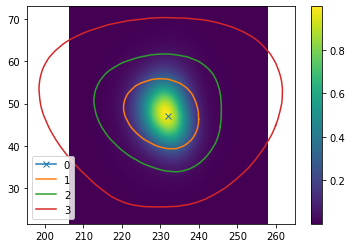

In [45]:
for i in range(4):
    if i == 0:
        marker='x'
    else:
        marker = None
    plt.plot(radec[i][:,0],radec[i][:,1],marker=marker,label=i)
plt.pcolormesh(ra, dec, Z,  shading='flat',vmin=Z.min(), vmax=Z.max())
plt.colorbar()
plt.legend()

In [47]:
pmap.geom.frame

'icrs'

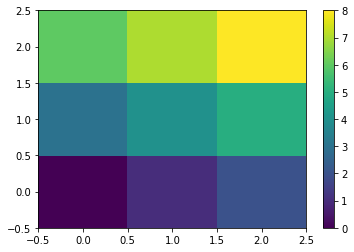

In [55]:
a = np.array([[0,1,2],[3,4,5],[6,7,8]])
x = np.arange(-0.5,3, 1)  # len = 11
y = np.arange(-0.5,3, 1)  # len = 7
Z = a
#fig, ax = plt.subplots()
plt.pcolormesh(x, y, Z,shading='auto',vmin=Z.min(), vmax=Z.max())
plt.colorbar()